WAV file input:  Fs = 44100, x.shape = (441000,), x.dtype = float64


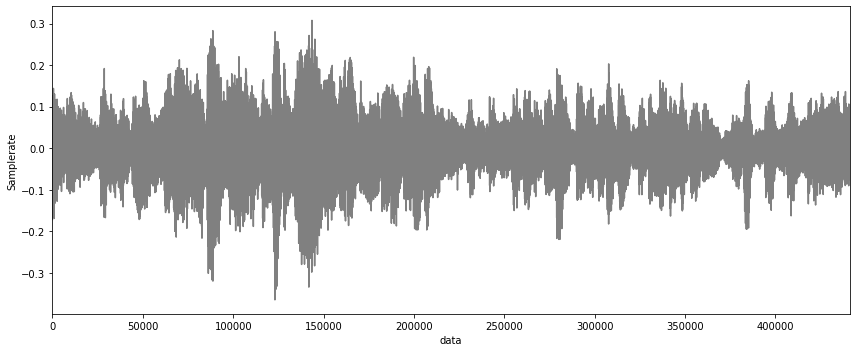

In [72]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
import soundfile as sf
%matplotlib inline

def print_plot_play(x, Fs, text=''):

    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(12, 5))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('data')
    plt.ylabel('Samplerate')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

# Read wav

data, samplerate = sf.read('./stegoworksdsss/original/demo.wav')
print_plot_play(x=data, Fs=samplerate, text='WAV file input: ')

In [125]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
data_array = np.random.randint(0, 2, 20)
print(data_array)

[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0]


In [122]:
import numpy as np   
#np.random.randint(2, size=(1, 20))
data_array2 = np.random.randint(0, 2, 20)
print(data_array2)

[0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0]


In [2]:
data_array = np.array([1,1,1,1,1,1,1,1,1,1,1,1])

In [3]:
data_array2 = np.array([0,0,0,0,0,1,1,1,1,1,1])

In [128]:
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

#window = np.hanning(51)

def mixer(L,bits,lower,upper,K):
    
    K = K - np.mod(K,4)
    N = len(bits)
    #encbit = str2num(reshape(bits, N, 1))'; 
    #encbit = np.reshape(bits,N*L,order="C")
    encbit = np.transpose(np.floor(np.reshape(bits,N*1,order="C")))
    mix_sig = np.reshape(np.ones((L,1))*encbit,N*L,order="C")
    c = np.convolve(mix_sig,hanning(K))
    #w_norm = c[int(K/2+1):int(-1-K/2+1)]/max(abs(c))
    w_norm = c/max(abs(c))
    w_sig = w_norm*(upper-lower)+lower
    mix_sig = mix_sig*(upper-lower)+lower
    return(w_sig,mix_sig)
                              

def hanning(L):
    
    window = np.hanning(L-1)
    
    return(window)

In [109]:
print(data)
print(data.size)

#Spread spectrum encoder :
def spread_spectrum_encoder(data,data_array):

        row = data.size
        bit = data_array
        L = int(row/len(bit))
        nframe = np.floor(row/L)
        N = int(nframe - np.mod(nframe,8))
        
        bits = bit[1:N]
        r = np.ones((L,1))
        pr = np.reshape(r*np.ones((1,N)),N*L,order="C")
        alpha = 0.005
        #w_norm = c[int(K/2+1):int(-1-K/2+1)]/max(abs(c))
        #mix = w_norm*(upper-lower)+lower
        [mix,datasig] = mixer(L,bits,-1,1,22055)
        out = data
   
        stego = data[1:N*L+1,] + alpha*mix*pr

        out = stego
        
        return(out)


[-0.17138672 -0.16784668 -0.16372681 ... -0.03451538 -0.03070068
 -0.02676392]
441000


In [159]:
        

#Spread spectrum encoder :
def spread_spectrum_encoder2(data,data_array):

        row = data.size
        bit = data_array
        L = int(row/len(bit))
        nframe = np.floor(row/L)
        N = int(nframe - np.mod(nframe,8))
        
        bits = bit[1:N]
        r = np.ones((L,1))
        pr = np.reshape(r*np.ones((1,N)),N*L,order="C")
        alpha = 0.005
        #w_norm = c[int(K/2+1):int(-1-K/2+1)]/max(abs(c))
        #mix = w_norm*(upper-lower)+lower
        [mix,datasig] = mixer(L,bits,-1,1,22055)
        out = data
   
        stego = data[1:N*L+1,] + alpha*mix*pr

        out = stego
        
        return(out)


In [127]:
from scipy.io.wavfile import write
import soundfile as sf
# to be added at end

output = spread_spectrum_encoder(data,data_array)



sf.write('./stegoworksdsss/ones/embed_ones.wav', output, samplerate)

In [160]:
from scipy.io.wavfile import write
import soundfile as sf
# to be added at end

output2 = spread_spectrum_encoder2(data,data_array2)



sf.write('./stegoworksdsss/zeros/embed_zeros.wav', output2, samplerate)

WAV file output:  Fs = 44100, x.shape = (352800,), x.dtype = float64


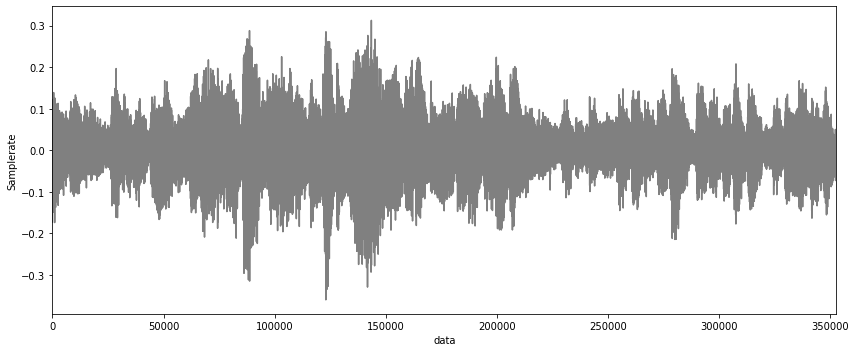

In [161]:
data2, samplerate2 = sf.read('./stegoworksdsss/ones/embed_ones.wav')
print_plot_play(x=data2, Fs=samplerate2, text='WAV file output: ')

WAV file output:  Fs = 44100, x.shape = (352800,), x.dtype = float64


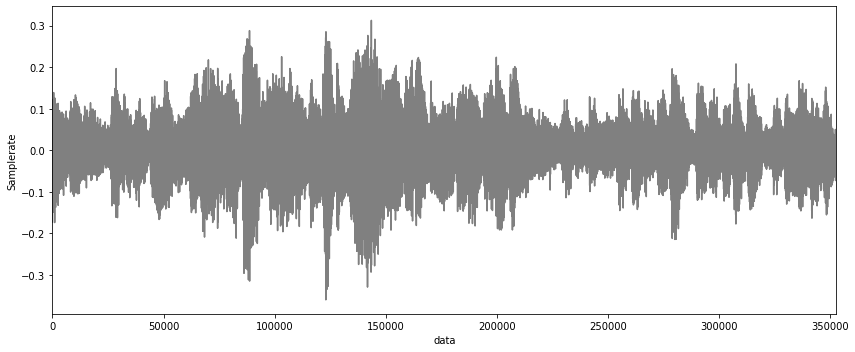

In [162]:
data3, samplerate3 = sf.read('./stegoworksdsss/zeros/embed_zeros.wav')
print_plot_play(x=data3, Fs=samplerate3, text='WAV file output: ')

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py

mfcc of original mean values [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  4.4254027e-09 -1.3276209e-08 -8.8508054e-09 -6.6381043e-09
 -1.3276209e-08  0.0000000e+00  0.0000000e+00  1.1063507e-08
  0.0000000e+00  0.0000000e+00  4.4254027e-09  6.6381043e-09
  1.3276209e-08  0.0000000e+00 -1.7701611e-08  8.8508054e-09]
mfcc of original variance values [1.         1.         1.         1.         0.9999999  1.0000001
 1.         1.         1.0000001  0.9999999  0.9999999  1.
 1.0000001  1.         1.         1.         1.         0.99999994
 1.0000001  0.9999999 ]
Shape of mfcc1 (20, 431)
sum of zero crossings 4
Weighted mean of frequencies present in the sound (431,)
mfcc of stegowork mean values [ 0.0000000e+00  1.1057094e-08  0.0000000e+00 -2.2114188e-08
  5.5285470e-09  1.1057094e-08  0.0000000e+00  0.0000000e+00
  2.7642735e-09  1.1057094e-08  1.1057094e-08  0.0000000e+00
 -5.5285470e-09  0.0000000e+00  0.0000000e+00  2.7642735e-09
  2.2114188e-08 -2.7642735e-09 -1.10

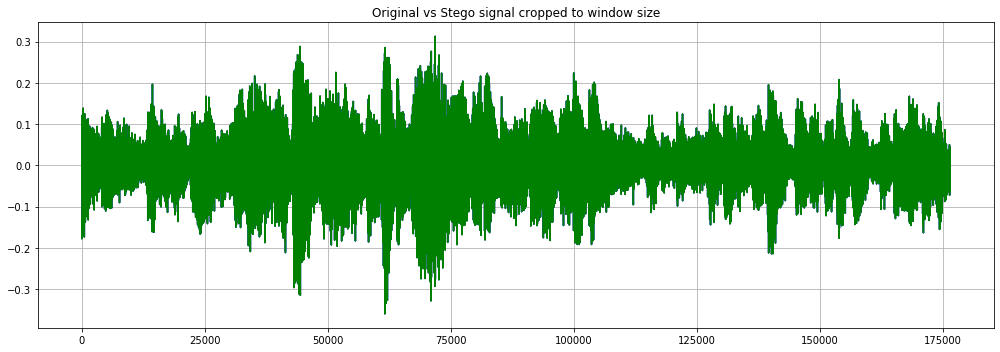

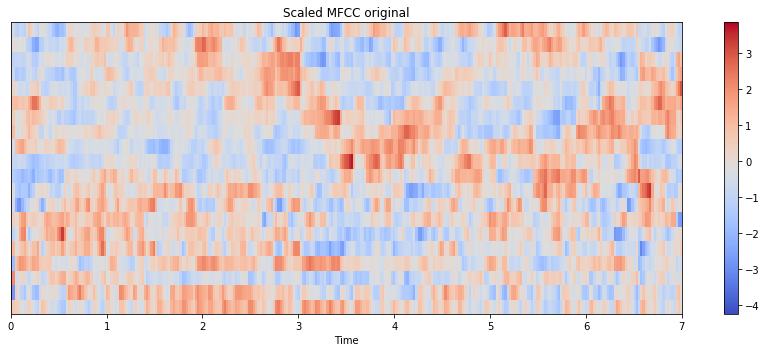

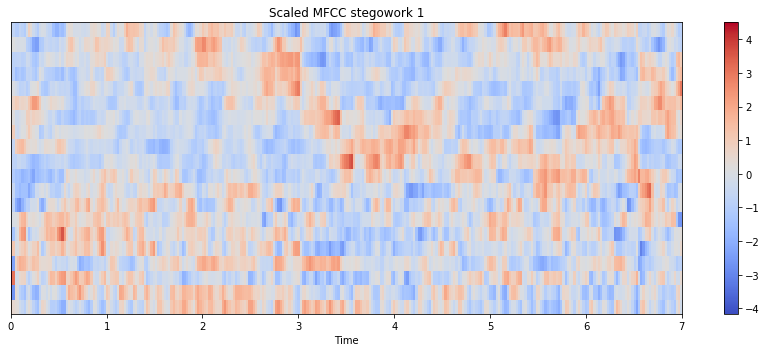

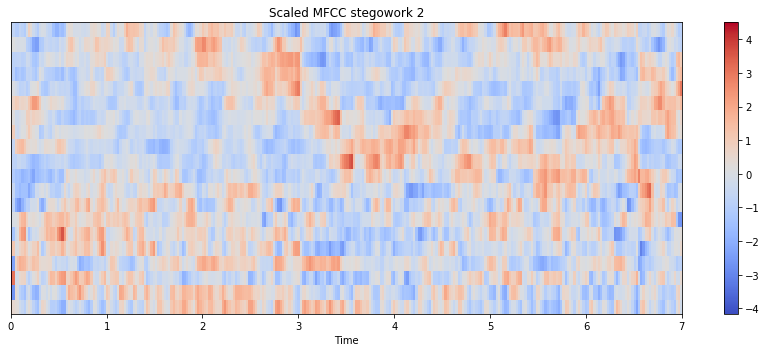

In [7]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from dtw import dtw
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
import seaborn as sns
import scipy
import sklearn
#Loading audio files
y1, sr1 = librosa.load('./stegoworksdsss/original/demo.wav') 
y2, sr2 = librosa.load('./stegoworksdsss/zeros/embed_zeros.wav') 
y3, sr3 = librosa.load('./stegoworksdsss/ones/embed_ones.wav') 

# Zooming in
#Here we will zoom or print spectrum for 500 array columns only.
n0 = 0
n1 = 100
plt.figure(figsize=(14, 5))
#plt.plot(y1,color='red')
plt.plot(y2,color='blue')
plt.plot(y3,color='green')
plt.grid()
plt.title('Original vs Stego signal cropped to window size')
plt.tight_layout()


mfcc1 = librosa.feature.mfcc(y1,sr1)  

mfcc1 = sklearn.preprocessing.scale(mfcc1, axis=1)
print("mfcc of original mean values", mfcc1.mean(axis=1))
print("mfcc of original variance values" ,mfcc1.var(axis=1))

plt.figure(figsize=(12, 5))
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.xlim([0, 7])
#plt.ylim([0, 2000])
plt.colorbar()
plt.title('Scaled MFCC original')
plt.tight_layout()




#mfcc computed 20 MFCCs over 431 frames.
print("Shape of mfcc1",mfcc1.shape)

#librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')


zero_crossings = librosa.zero_crossings(y1[n0:n1], pad=False)
print('sum of zero crossings',sum(zero_crossings))

#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(y1, sr=sr1)[0]
print('Weighted mean of frequencies present in the sound' ,spectral_centroids.shape)


#----------------------------------------------------------------------------------------------------------------

mfcc2 = librosa.feature.mfcc(y2,sr2)  


mfcc2 = sklearn.preprocessing.scale(mfcc2, axis=1)
print("mfcc of stegowork mean values", mfcc2.mean(axis=1))
print("mfcc of stegowork variance values", mfcc2.var(axis=1))

plt.figure(figsize=(12, 5))
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.xlim([0, 7])
plt.colorbar()
plt.title('Scaled MFCC stegowork 1')
plt.tight_layout()




#mfcc computed 20 MFCCs over 431 frames.
print("Shape of mfcc2",mfcc2.shape)

zero_crossings1 = librosa.zero_crossings(y2[n0:n1], pad=False)
print('sum of zero crossings',sum(zero_crossings1))

#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids1 = librosa.feature.spectral_centroid(y2, sr=sr2)[0]
print('Weighted mean of frequencies present in the sound for stego1' ,spectral_centroids1.shape)



#-----------------------------------------------------------------


mfcc3 = librosa.feature.mfcc(y3,sr3)  

mfcc3 = sklearn.preprocessing.scale(mfcc3, axis=1)
print("mfcc of stegowork mean values", mfcc3.mean(axis=1))
print("mfcc of stegowork variance values", mfcc3.var(axis=1))

plt.figure(figsize=(12, 5))
librosa.display.specshow(mfcc3, sr=sr3, x_axis='time')
plt.xlim([0, 7])
plt.colorbar()
plt.title('Scaled MFCC stegowork 2')
plt.tight_layout()




#mfcc computed 20 MFCCs over 431 frames.
print("Shape of mfcc3",mfcc3.shape)

zero_crossings2 = librosa.zero_crossings(y3[n0:n1], pad=False)
print('sum of zero crossings',sum(zero_crossings1))

#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids2 = librosa.feature.spectral_centroid(y3, sr=sr3)[0]
print('Weighted mean of frequencies present in the sound for stego2' ,spectral_centroids2.shape)



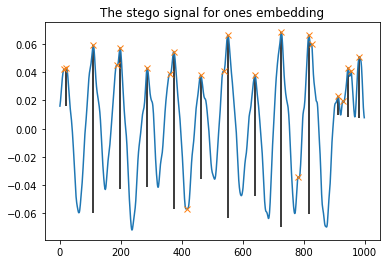

[ 14  21 110 186 197 287 361 374 417 462 537 551 640 727 782 817 826 913
 928 946 955 983]


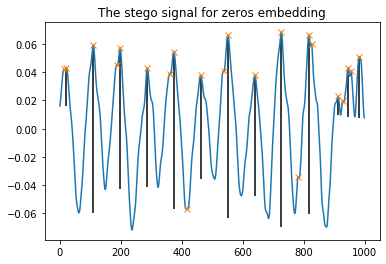

[ 14  21 110 186 197 287 361 374 417 462 537 551 640 727 782 817 826 913
 928 946 955 983]


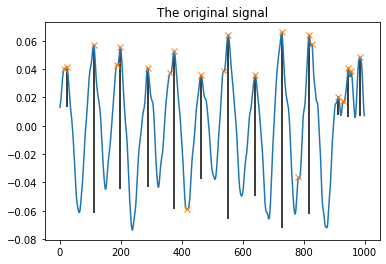

[ 15  22 111 187 198 288 362 375 418 463 538 552 641 728 783 818 827 914
 929 947 956 984]


In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks, peak_prominences

import matplotlib.pyplot as plt


data2, samplerate2 = sf.read('./stegoworksdsss/ones/embed_ones.wav')

crop_data2 = data2[13000:14000]

peaks, _ = find_peaks(crop_data2)

prominences = peak_prominences(crop_data2, peaks)[0]

prominences


contour_heights = crop_data2[peaks] - prominences

plt.plot(crop_data2)
plt.plot(peaks , crop_data2[peaks], "x")

plt.vlines(x=peaks, ymin=contour_heights, ymax=crop_data2[peaks])
plt.title('The stego signal for ones embedding')
plt.show()


print(peaks)
#--------------------------------------------------------------



data3, samplerate3 = sf.read('./stegoworksdsss/zeros/embed_zeros.wav')

crop_data3 = data3[13000:14000]

peaks1, _ = find_peaks(crop_data3)

prominences1 = peak_prominences(crop_data3, peaks1)[0]

prominences1


contour_heights1 = crop_data3[peaks1] - prominences1
plt.plot(crop_data3)

plt.plot(peaks1, crop_data3[peaks1], "x")

plt.vlines(x=peaks1, ymin=contour_heights1, ymax=crop_data3[peaks1])

plt.title('The stego signal for zeros embedding')
plt.show()

#-----------------

print(peaks1)


data, samplerate = sf.read('./stegoworksdsss/original/demo.wav')


crop_data = data[13000:14000]

peaks2, _ = find_peaks(crop_data)

prominences2 = peak_prominences(crop_data, peaks2)[0]

prominences2


contour_heights2 = crop_data[peaks2] - prominences2
plt.plot(crop_data)

plt.plot(peaks2, crop_data[peaks2] , "x")

plt.vlines(x=peaks2, ymin=contour_heights2, ymax=crop_data[peaks])


plt.title('The original signal')
plt.show()

print(peaks2)



In [165]:

#dynamic time warping

distance,path = fastdtw(mfcc1.T, mfcc2.T, dist=euclidean)
print("The normalized distance between the two : " ,distance)

def compute_cost_matrix(X, Y, metric='euclidean'):
   
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C

#Computes the distance between points using Euclidean distance (2-norm) as the distance metric between the points. 
C =  compute_cost_matrix(mfcc1,mfcc2 , metric='euclidean')
print('Euclidean cost matrix C =', C, sep='\n')

#Computes the correlation distance between vectors u and v
Corr = compute_cost_matrix(mfcc1, mfcc2, metric='correlation')
print('Correlation matrix corr =', Corr, sep='\n')


The normalized distance between the two :  780.5095272519287
Euclidean cost matrix C =
[[2.19512838 3.55175308 8.51172714 ... 8.56427126 7.86102763 7.2683184 ]
 [3.867962   1.42221045 5.71425632 ... 7.46022199 6.93435944 6.25117009]
 [9.0689915  6.43643145 0.49415646 ... 8.23973691 8.24531649 7.01111582]
 ...
 [9.07826019 7.11869882 4.34258306 ... 7.50661291 7.31016847 6.18172116]
 [8.67178938 6.66059093 4.13323897 ... 6.83155027 6.58997252 5.30194801]
 [9.63721576 7.74686911 5.14405281 ... 7.73682656 7.51398484 6.13789621]]
Correlation matrix corr =
[[0.03692595 0.1322562  1.22956508 ... 0.85739495 0.74805234 0.79750942]
 [0.11625635 0.03044473 0.84593849 ... 0.84002968 0.76266197 0.89227002]
 [1.19114632 0.9088325  0.00617956 ... 1.21249184 1.30577013 1.43515645]
 ...
 [1.21312906 1.13351498 0.63163039 ... 1.12102633 1.13686191 1.24980704]
 [1.22000416 1.12461311 0.67002598 ... 1.03868879 1.04254788 1.12092135]
 [1.34704341 1.26864205 0.71759417 ... 1.25077927 1.25484605 1.23146266]]